In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk
from IPython.display import clear_output

In [14]:
class GUI:
    def __init__(self,loc):
        self.loc = loc
        pass
        
    def show_image(self):
        img = [plt.imread(f) for f in self.p.iterdir() if f.suffix == '.jpg']
        base = 12
        print('='*30,self.p.name,'='*30)
        plt.figure(figsize=(base*len(img),base))
        plt.imshow(np.hstack(img),cmap='gray')
        plt.show()
        
    def run(self):
        LVEF = {}
        ps = pathlib.Path(self.loc).iterdir()
        self.p = next(ps)
        self.show_image()
        
        window = tk.Tk()
        window.title('LVEF')
        window.geometry("300x100+250+150")
        
        unknown_frame = tk.Frame(window)
        unknown_frame.pack(side=tk.TOP)
        unknown_label = tk.Label(unknown_frame, text='unknown method')
        unknown_label.pack(side=tk.LEFT)
        unknown_entry = tk.Entry(unknown_frame)
        unknown_entry.pack(side=tk.LEFT)

        dodge_frame = tk.Frame(window)
        dodge_frame.pack(side=tk.TOP)
        dodge_label = tk.Label(dodge_frame, text="dodge's method")
        dodge_label.pack(side=tk.LEFT)
        dodge_entry = tk.Entry(dodge_frame)
        dodge_entry.pack(side=tk.LEFT)

        simpson_frame = tk.Frame(window)
        simpson_frame.pack(side=tk.TOP)
        simpson_label = tk.Label(simpson_frame, text="simpson's method")
        simpson_label.pack(side=tk.LEFT)
        simpson_entry = tk.Entry(simpson_frame)
        simpson_entry.pack(side=tk.LEFT)
        
        def next_file():
            unknown = unknown_entry.get()
            unknown = float(unknown) if unknown != '' else None

            dodge = dodge_entry.get()
            dodge = float(dodge) if dodge != '' else None

            simpson = simpson_entry.get()
            simpson = float(simpson) if simpson != '' else None

            if (unknown == None) & (dodge == None) & (simpson == None):
                check = input(f'Make sure to remove the folder: {self.p.name}')
                if check.lower().startswith('y'):
                    for f in self.p.iterdir():
                        f.unlink()
                    self.p.rmdir()
            else:
                LVEF[self.p.name] = dict(unknown=unknown,dodge=dodge,simpson=simpson)

            unknown_entry.delete(0,'end')
            dodge_entry.delete(0,'end')
            simpson_entry.delete(0,'end')
            
            clear_output()
            try:
                self.p = next(ps)
                self.show_image()
            except StopIteration:
                window.destroy()
                
        button_frame = tk.Frame(window)
        button_frame.pack(side=tk.TOP)
        next_button = tk.Button(button_frame,
                           text = 'Next',
                           command = next_file)

        next_button.pack(side=tk.LEFT)

        window.mainloop()
        return pd.DataFrame.from_dict(LVEF,orient='index')

In [15]:
LVEF = GUI(r'D:\Dataset_Collection\Cardiac_Catheterization\backup\raw_data').run()
clear_output()
LVEF

,unknown,dodge,simpson
0681 basal hypo,57.30,NaN,NaN
0736 apical hypo,60.60,NaN,NaN
2C0296 ant hypo,45.90,NaN,NaN
2C0336 ant hypo,53.40,NaN,NaN
2C2460 apical hypo,55.24,NaN,NaN
2C6364 basal hypo,NaN,50.5,53.0
2C6369 basal hypo,NaN,36.6,35.5
2C6749 basal hypo,NaN,37.4,38.1
2C6950 apical hypo,NaN,62.4,62.9
2C6977 normal,NaN,62.3,64.4


array([[<AxesSubplot:title={'center':'unknown'}>,
        <AxesSubplot:title={'center':'dodge'}>],
       [<AxesSubplot:title={'center':'simpson'}>, <AxesSubplot:>]],
      dtype=object)

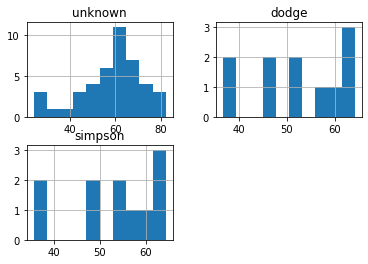

In [17]:
LVEF.hist()

In [18]:
LVEF.to_csv(r'D:\Dataset_Collection\Cardiac_Catheterization\backup\LVEF.csv')